In [2]:
# Start writing code here...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_selector,make_column_transformer

from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [14]:
data = pd.read_csv('fuel.csv')
X = data.drop('FE',axis = 'columns')
y = data.FE

preprocessor = make_column_transformer(
    (StandardScaler(),make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),make_column_selector(dtype_include=object))
)

X = preprocessor.fit_transform(X)
y = np.log(y)

model = Sequential([Dense(512,activation = 'relu',input_shape = [X.shape[1]]),
Dense(256, activation = 'relu'),
Dense(128,activation = 'relu'),
Dense(64,activation = 'relu'),
Dense(1)
])

model.compile(loss='mae',optimizer = 'adam')
final_model = model.fit(X,y,batch_size=256,epochs=200)


Epoch 1/200
5/5 [==============================] - 0s 4ms/step - loss: 3.1177
Epoch 2/200
5/5 [==============================] - 0s 4ms/step - loss: 1.0088
Epoch 3/200
5/5 [==============================] - 0s 5ms/step - loss: 0.6682
Epoch 4/200
5/5 [==============================] - 0s 5ms/step - loss: 0.5178
Epoch 5/200
5/5 [==============================] - 0s 12ms/step - loss: 0.4062
Epoch 6/200
5/5 [==============================] - 0s 4ms/step - loss: 0.2941
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 0.2236
Epoch 8/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1756
Epoch 9/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1294
Epoch 10/200
5/5 [==============================] - 0s 14ms/step - loss: 0.1152
Epoch 11/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1014
Epoch 12/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0890
Epoch 13/200
5/5 [==============================] - 0s 4ms/

<AxesSubplot:>

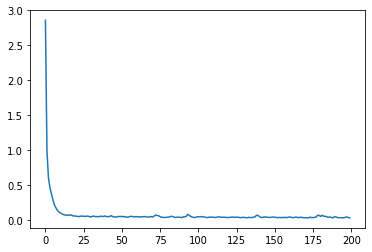

In [20]:
new_data = pd.DataFrame(final_model.history)
new_data.loss.plot()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=88190736-eb57-4922-a018-2ff5a44a7537' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>